<a href="https://colab.research.google.com/github/mcnica89/manim/blob/main/Heads-Tails-vs-Head-Heads-Coinflip_Game_Sims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def target_seq_sample(target_sequence,N_samples,N_max_coin_flips=100):
  # Simulates playing the game until the "target sequenence appears"
  # N_sample times and return an array of lenght N_samples with the outcomes
  #
  #Example: If N_sample = 2, and target_sequence = [0,0] then it will play the 
  #  game twice and see how many flips until "HH" appears
  #  and return an array of size 2 with the two outcomes
  #
  #Important: It will give up after "N_max_coin_flips", so if HH does not appear
  #  in this many coinflips, it will just return that number instead


  #Generate a bunch of random coin flips
  #Note that '0,2' means from 0 inclusive to 2 inclusive, so this is random binary 
  coin_flips = np.random.randint(0,2,(N_samples,N_max_coin_flips))
  
  def first_index(my_array,target):
    #Find the index of the first appearence of the array b in a
    for ix in range(len(my_array)-len(target)+1):
      if np.all(my_array[ix:ix+len(target)] == target):
        return ix+len(target)
    
    #If we haven't found it yet, just give up and return the maximum number
    return N_max_coin_flips

  #Find the first index 
  return np.array([first_index(coin_flips[i,:],target_sequence) for i in range(N_samples)])


In [28]:
HT = np.array([0,1])
HH = np.array([1,1])

print("---HH----")
#Example: Flips until HH 3 times
print(f"3 samples for HH: {target_seq_sample(HH,3)}")
#Average afer 10,000 samp;ls"
print(f" Avg for HH after 10,000 samples: {np.mean(target_seq_sample(HH,10000))}")

print("---HT----")
#Example: Flips until HH 3 times
print(f"3 samples for HT: {target_seq_sample(HT,3)}")
#Average afer 10,000 samp;ls"
print(f" Avg for HT after 10,000 samples: {np.mean(target_seq_sample(HT,10000))}")


---HH----
3 samples for HH: [6 4 5]
 Avg for HH after 10,000 samples: 6.0473
---HT----
3 samples for HT: [8 6 4]
 Avg for HT after 10,000 samples: 3.9955


<Figure size 1008x504 with 0 Axes>

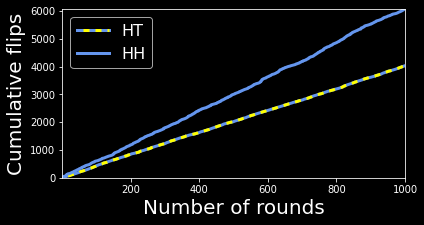

In [44]:
plt.style.use('dark_background')
plt. figure(figsize=(14,7))

HT = np.array([0,1])
HH = np.array([1,1])

myfontsize = 20
fig, ax = plt.subplots()
ax.set_xlabel('Number of rounds',fontsize=myfontsize)
ax.set_ylabel('Cumulative flips',fontsize=myfontsize)

N = 1000
x = np.arange(1,N+1)
HT_data = np.cumsum(target_seq_sample(HT,N))
HH_data = np.cumsum(target_seq_sample(HH,N))

HTa_line, = plt.plot(x, HT_data, linestyle='-',color='cornflowerblue', lw=3)
HTb_line, = plt.plot(x, HT_data, color='yellow', linestyle=(2, (2, 2)), lw=3)

HH_line, = plt.plot(x, HH_data, linestyle='-',color='cornflowerblue', lw=3)

extreme = max(np.max(np.abs(HT_data)), np.max(np.abs(HH_data)))

plt.axis([1,N, 0, max(extreme,6*N)])
plt.legend([(HTa_line, HTb_line),(HH_line)], ['HT','HH'],fontsize=16)


#L = 6
#x = np.linspace(0, L)
#ncolors = len(plt.rcParams['axes.prop_cycle'])
#shift = np.linspace(0, L, ncolors, endpoint=False)
#for s in shift:
#    ax.plot(x, np.sin(x + s), 'o-')

#ax.set_title("'dark_background' style sheet")

#plt.show()
r = 0.3
fig.tight_layout()
fig.set_size_inches(20*r, 10*r)
plt.savefig('bets.png', dpi=300)